In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data
pd.read_csv("C:/datasets/Breast_cancer_data.csv")
Breast_cancer_data = pd.read_csv("C:/datasets/Breast_cancer_data.csv")
Breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Preprocessing

In [3]:
Breast_cancer_data.shape

(569, 33)

In [4]:
#detected NaN value in each column 
Breast_cancer_data.isna().sum()
# Unnamed: 32 will be dropped because it's completely empty

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
Breast_cancer_data.drop("Unnamed: 32", axis=1, inplace = True)

In [6]:
Breast_cancer_data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
Breast_cancer_data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
# one hot encoding on the categorical data "diagnosis"
Breast_cancer_data["diagnosis"] = Breast_cancer_data["diagnosis"].apply(lambda x : 1 if x == "M" else 0)
Breast_cancer_data["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

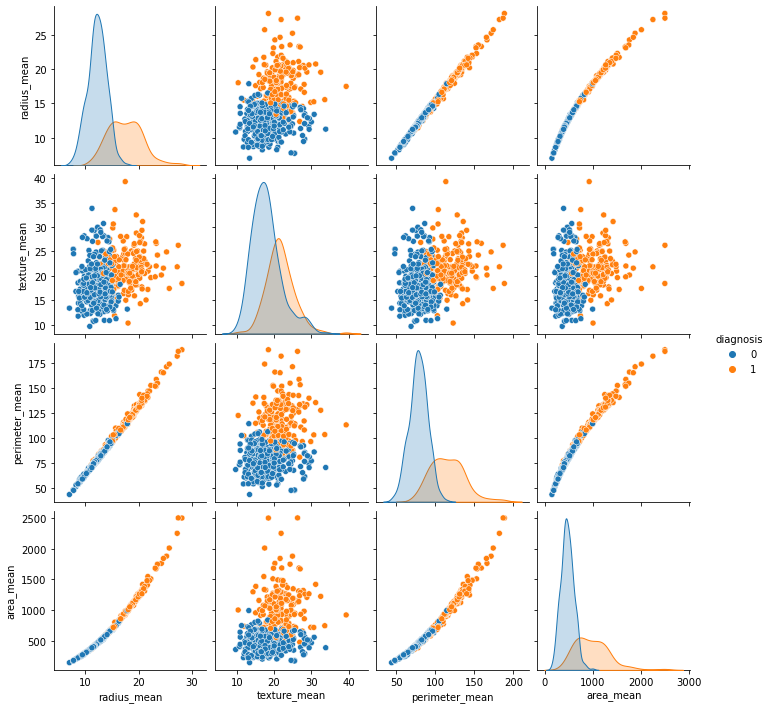

In [11]:
sns.pairplot(Breast_cancer_data.iloc[:,1:6], hue="diagnosis")

In [13]:
Breast_cancer_data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [15]:
Breast_cancer_data.iloc[:, 1:10].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000


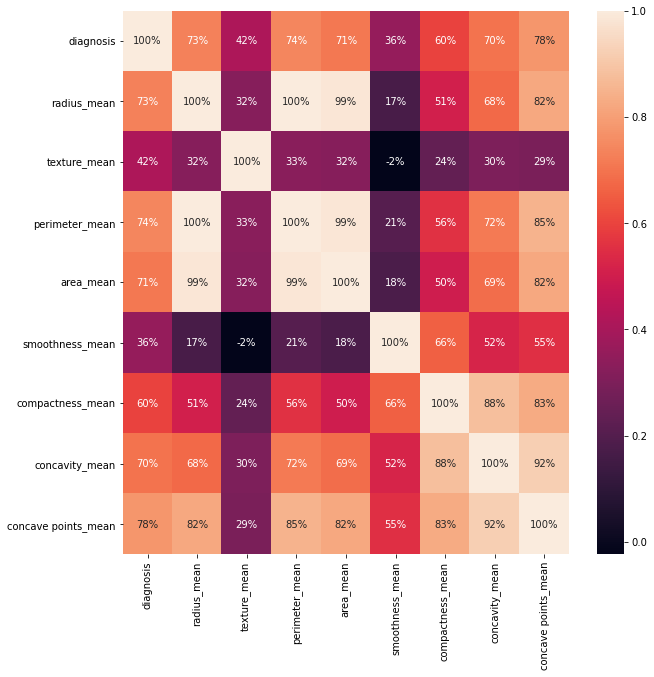

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(Breast_cancer_data.iloc[:, 1:10].corr(), annot=True, fmt=".0%");

In [22]:
X= Breast_cancer_data.iloc[:,2:31].values
Y= Breast_cancer_data.iloc[:,1].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 1234)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train

array([[ 0.56834943, -0.7455382 ,  0.58009089, ..., -0.31116881,
         0.14461744,  0.39847515],
       [-0.28961453, -0.14718352, -0.26447524, ...,  1.02736027,
         1.41557963,  1.61872573],
       [-0.48980612, -0.45906723, -0.49432026, ..., -0.35097293,
        -0.15604028,  0.20571803],
       ...,
       [-0.48980612, -0.16104502, -0.46771975, ..., -0.05336774,
        -0.21374227,  0.1714138 ],
       [ 1.15462481, -0.13794252,  1.16197701, ..., -0.07558399,
         0.25698447,  0.18284854],
       [-0.41830912, -1.2745854 , -0.43904107, ..., -1.04740609,
        -0.79182507, -0.88221622]])

In [50]:
# Predicting using differnt models

def models(X_train,Y_train):
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    Decision_tree = DecisionTreeClassifier(criterion = "entropy")
    Decision_tree.fit(X_train, Y_train)
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log_regression = LogisticRegression()
    log_regression.fit(X_train, Y_train)
    
    #Random forest classifier
    from sklearn.ensemble import RandomForestClassifier
    rand_forest = RandomForestClassifier()
    rand_forest.fit(X_train, Y_train)
    
    print("[0]Decision Tree training accuracy : ", Decision_tree.score(X_train, Y_train))
    print("[1]Logistic Regression training accuracy : ", log_regression.score(X_train, Y_train))
    print("[2]Random forest classifier training accuracy : ", rand_forest.score(X_train, Y_train))
    
    return Decision_tree, log_regression, rand_forest


In [51]:
model = models(X_train, Y_train)

[0]Decision Tree training accuracy :  1.0
[1]Logistic Regression training accuracy :  0.9953051643192489
[2]Random forest classifier training accuracy :  1.0


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, model[0].predict(X_test))
confusion_matrix

array([[85,  3],
       [ 6, 49]], dtype=int64)

In [64]:
# Checking accuracy of model on test data
from sklearn import metrics
def accuracy_score():
    print("Accuracy score for each model are; ")
    print(" Decision Tree : ", metrics.accuracy_score(Y_test, model[0].predict(X_test)))
    print(" Logistic Regression : ", metrics.accuracy_score(Y_test, model[1].predict(X_test)))
    print(" Random forest classifier : ", metrics.accuracy_score(Y_test, model[2].predict(X_test)))
accuracy_score()

Accuracy score for each models are; 
 Decision Tree :  0.9370629370629371
 Logistic Regression :  0.958041958041958
 Random forest classifier :  0.9300699300699301


In [66]:
def F1_score():
    print("F1 score for each model are; ")
    print(" Decision Tree : ", metrics.f1_score(Y_test, model[0].predict(X_test)))
    print(" Logistic Regression : ", metrics.f1_score(Y_test, model[1].predict(X_test)))
    print(" Random forest classifier : ", metrics.f1_score(Y_test, model[2].predict(X_test)))
F1_score()

F1 score for each model are; 
 Decision Tree :  0.9158878504672897
 Logistic Regression :  0.9444444444444444
 Random forest classifier :  0.9038461538461537


In [71]:
#predict using the logistic regression model and compare with the actual values
prediction = model[1].predict(X_test)
print(prediction)
print("  ")
print(Y_test)

[0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1
 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1]
  
[0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1
 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1]


In [74]:
# model evaluation table 
algor = ["Decision Tree", "Logistic regression", "Random forest classifier"]
accuracy_score = [metrics.accuracy_score(Y_test, model[0].predict(X_test)), metrics.accuracy_score(Y_test, model[1].predict(X_test)), metrics.accuracy_score(Y_test, model[2].predict(X_test))]
F1_score = [metrics.f1_score(Y_test, model[0].predict(X_test)), metrics.f1_score(Y_test, model[1].predict(X_test)), metrics.f1_score(Y_test, model[2].predict(X_test))]
Model_evaluation = pd.DataFrame({"MODEL": algor, "ACCURACY SCORE" : accuracy_score, "F1 SCORE" : F1_score})
Model_evaluation

,MODEL,ACCURACY SCORE,F1 SCORE
0,Decision Tree,0.937063,0.915888
1,Logistic regression,0.958042,0.944444
2,Random forest classifier,0.930070,0.903846
